In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import seaborn as sns 
import matplotlib.pyplot as plt

# Read the CSV 

Testing Data

In [3]:
test_file = "Resources/raw/test.csv"
test = pd.read_csv(test_file)
test_df = pd.DataFrame(test)
test_df.head(5)

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3.0,2850.0,sqft,4200.00,sqft,98119,1175000.0
1,4,5.0,3040.0,sqft,5002.00,sqft,98106,1057500.0
2,3,1.0,1290.0,sqft,6048.00,sqft,98125,799000.0
3,3,2.0,2360.0,sqft,0.28,acre,98188,565000.0
4,3,3.5,1942.0,sqft,1603.00,sqft,98107,1187000.0


In [4]:
test_df.dtypes

beds                int64
baths             float64
size              float64
size_units         object
lot_size          float64
lot_size_units     object
zip_code            int64
price             float64
dtype: object

In [5]:
# Using VLOOKUP in Excel, found corresponding coordinates 
test_coordinates = "Resources/raw/test_coordinates_only.csv"
test_1 = pd.read_csv(test_coordinates)
test_coordinates_df = pd.DataFrame(test_1)
test_coordinates_df.head(5)

,zip_code,lat,lon
0,98119,47.6379,-122.3643
1,98106,47.5344,-122.3547
2,98125,47.7170,-122.3015
3,98188,47.4483,-122.2731
4,98107,47.6701,-122.3763


In [6]:
# Combining coordinates with test file 
test_file_updated = pd.concat([test_df, test_coordinates_df['lat'],test_coordinates_df['lon']],axis=1)
test_file_updated.head(5)

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,lat,lon
0,3,3.0,2850.0,sqft,4200.00,sqft,98119,1175000.0,47.6379,-122.3643
1,4,5.0,3040.0,sqft,5002.00,sqft,98106,1057500.0,47.5344,-122.3547
2,3,1.0,1290.0,sqft,6048.00,sqft,98125,799000.0,47.7170,-122.3015
3,3,2.0,2360.0,sqft,0.28,acre,98188,565000.0,47.4483,-122.2731
4,3,3.5,1942.0,sqft,1603.00,sqft,98107,1187000.0,47.6701,-122.3763


In [7]:
# Convert all acres under lot_size_units column to sqft 
convert_1 = test_file_updated['lot_size_units'] == "acre"
test_file_updated.loc[convert_1, 'lot_size']*=43560
test_file_updated.head(10)

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,lat,lon
0,3,3.0,2850.0,sqft,4200.0,sqft,98119,1175000.0,47.6379,-122.3643
1,4,5.0,3040.0,sqft,5002.0,sqft,98106,1057500.0,47.5344,-122.3547
2,3,1.0,1290.0,sqft,6048.0,sqft,98125,799000.0,47.7170,-122.3015
3,3,2.0,2360.0,sqft,12196.8,acre,98188,565000.0,47.4483,-122.2731
4,3,3.5,1942.0,sqft,1603.0,sqft,98107,1187000.0,47.6701,-122.3763
5,2,2.0,963.0,sqft,4753.0,sqft,98122,701000.0,47.6116,-122.3056
6,1,1.0,756.0,sqft,NaN,NaN,98105,480000.0,47.6633,-122.3022
7,4,6.0,3300.0,sqft,5810.0,sqft,98199,1795000.0,47.6488,-122.3964
8,4,2.0,2060.0,sqft,4206.0,sqft,98144,1025000.0,47.5846,-122.3005
9,1,1.0,672.0,sqft,NaN,NaN,98122,450000.0,47.6116,-122.3056


In [8]:
# Change all rows under "lot_size_units" to "sqft"
test_file_updated.loc[convert_1, 'lot_size_units']='sqft'
test_file_updated

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,lat,lon
0,3,3.0,2850.0,sqft,4200.0,sqft,98119,1175000.0,47.6379,-122.3643
1,4,5.0,3040.0,sqft,5002.0,sqft,98106,1057500.0,47.5344,-122.3547
2,3,1.0,1290.0,sqft,6048.0,sqft,98125,799000.0,47.7170,-122.3015
3,3,2.0,2360.0,sqft,12196.8,sqft,98188,565000.0,47.4483,-122.2731
4,3,3.5,1942.0,sqft,1603.0,sqft,98107,1187000.0,47.6701,-122.3763
...,...,...,...,...,...,...,...,...,...,...
500,5,4.5,5580.0,sqft,13068.0,sqft,98146,3800000.0,47.4995,-122.3603
501,3,2.5,1390.0,sqft,1570.0,sqft,98126,575000.0,47.5444,-122.3735
502,3,2.5,2950.0,sqft,20473.2,sqft,98118,3105000.0,47.5412,-122.2750
503,5,5.0,3010.0,sqft,4887.0,sqft,98115,1807000.0,47.6849,-122.2968


In [9]:
test_file_updated.drop(columns = ["size_units", "lot_size_units"], inplace = True)
test_file_updated

,beds,baths,size,lot_size,zip_code,price,lat,lon
0,3,3.0,2850.0,4200.0,98119,1175000.0,47.6379,-122.3643
1,4,5.0,3040.0,5002.0,98106,1057500.0,47.5344,-122.3547
2,3,1.0,1290.0,6048.0,98125,799000.0,47.7170,-122.3015
3,3,2.0,2360.0,12196.8,98188,565000.0,47.4483,-122.2731
4,3,3.5,1942.0,1603.0,98107,1187000.0,47.6701,-122.3763
...,...,...,...,...,...,...,...,...
500,5,4.5,5580.0,13068.0,98146,3800000.0,47.4995,-122.3603
501,3,2.5,1390.0,1570.0,98126,575000.0,47.5444,-122.3735
502,3,2.5,2950.0,20473.2,98118,3105000.0,47.5412,-122.2750
503,5,5.0,3010.0,4887.0,98115,1807000.0,47.6849,-122.2968


In [10]:
# Drop the null values
test_file_final = test_file_updated.dropna()
test_file_final.shape

(428, 8)

In [11]:
test_file_final.to_csv("Resources/Clean/test_clean.csv", index=False)

Training Data

In [12]:
train_file = "Resources/raw/train.csv"
train = pd.read_csv(train_file)
train_df = pd.DataFrame(train)
train_df.head(5)

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [13]:
# Using VLOOKUP in Excel, found corresponding coordinates 
train_coordinates = "Resources/raw/train_coordinates_only.csv"
train_1 = pd.read_csv(train_coordinates)
train_coordinates_df = pd.DataFrame(train_1)
train_coordinates_df.head(5)

,zip_code,lat,lon
0,98144,47.5846,-122.3005
1,98106,47.5344,-122.3547
2,98107,47.6701,-122.3763
3,98199,47.6488,-122.3964
4,98102,47.6302,-122.3210


In [14]:
# Combining coordinates with train file 
train_file_updated = pd.concat([train_df, train_coordinates_df['lat'],train_coordinates_df['lon']],axis=1)
train_file_updated.head(5)

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,lat,lon
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0,47.5846,-122.3005
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0,47.5344,-122.3547
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0,47.6701,-122.3763
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0,47.6488,-122.3964
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0,47.6302,-122.3210


In [15]:
# Convert all acres under lot_size_units column to sqft 
convert_2 = train_file_updated['lot_size_units'] == "acre"
train_file_updated.loc[convert_2, 'lot_size']*=43560
train_file_updated.head(10)

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,lat,lon
0,3,2.5,2590.0,sqft,6000.0,sqft,98144,795000.0,47.5846,-122.3005
1,4,2.0,2240.0,sqft,13503.6,acre,98106,915000.0,47.5344,-122.3547
2,4,3.0,2040.0,sqft,3783.0,sqft,98107,950000.0,47.6701,-122.3763
3,4,3.0,3800.0,sqft,5175.0,sqft,98199,1950000.0,47.6488,-122.3964
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0,47.6302,-122.3210
5,2,2.0,1190.0,sqft,43560.0,acre,98107,740000.0,47.6701,-122.3763
6,1,1.0,670.0,sqft,6000.0,sqft,98133,460000.0,47.7377,-122.3431
7,5,3.5,4510.0,sqft,6000.0,sqft,98105,3150000.0,47.6633,-122.3022
8,3,2.5,1520.0,sqft,741.0,sqft,98108,565000.0,47.5413,-122.3129
9,4,2.0,2340.0,sqft,9500.0,sqft,98178,699000.0,47.4924,-122.2359


In [16]:
# Change all rows under "lot_size_units" to "sqft"
train_file_updated.loc[convert_2, 'lot_size_units']='sqft'
train_file_updated

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,lat,lon
0,3,2.5,2590.0,sqft,6000.0,sqft,98144,795000.0,47.5846,-122.3005
1,4,2.0,2240.0,sqft,13503.6,sqft,98106,915000.0,47.5344,-122.3547
2,4,3.0,2040.0,sqft,3783.0,sqft,98107,950000.0,47.6701,-122.3763
3,4,3.0,3800.0,sqft,5175.0,sqft,98199,1950000.0,47.6488,-122.3964
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0,47.6302,-122.3210
...,...,...,...,...,...,...,...,...,...,...
2011,3,2.0,1370.0,sqft,21780.0,sqft,98112,910000.0,47.6301,-122.2972
2012,1,1.0,889.0,sqft,NaN,NaN,98121,550000.0,47.6151,-122.3447
2013,4,2.0,2140.0,sqft,6250.0,sqft,98199,1150000.0,47.6488,-122.3964
2014,2,2.0,795.0,sqft,NaN,NaN,98103,590000.0,47.6733,-122.3426


In [17]:
train_file_updated.drop(columns = ["size_units", "lot_size_units"], inplace = True)
train_file_updated

,beds,baths,size,lot_size,zip_code,price,lat,lon
0,3,2.5,2590.0,6000.0,98144,795000.0,47.5846,-122.3005
1,4,2.0,2240.0,13503.6,98106,915000.0,47.5344,-122.3547
2,4,3.0,2040.0,3783.0,98107,950000.0,47.6701,-122.3763
3,4,3.0,3800.0,5175.0,98199,1950000.0,47.6488,-122.3964
4,2,2.0,1042.0,NaN,98102,950000.0,47.6302,-122.3210
...,...,...,...,...,...,...,...,...
2011,3,2.0,1370.0,21780.0,98112,910000.0,47.6301,-122.2972
2012,1,1.0,889.0,NaN,98121,550000.0,47.6151,-122.3447
2013,4,2.0,2140.0,6250.0,98199,1150000.0,47.6488,-122.3964
2014,2,2.0,795.0,NaN,98103,590000.0,47.6733,-122.3426


In [18]:
#Drop the null values
train_file_final = train_file_updated.dropna()
train_file_final.shape

(1669, 8)

In [19]:
train_file_final.to_csv("Resources/Clean/train_clean.csv", index=False)

In [20]:
train_file_final.head()

,beds,baths,size,lot_size,zip_code,price,lat,lon
0,3,2.5,2590.0,6000.0,98144,795000.0,47.5846,-122.3005
1,4,2.0,2240.0,13503.6,98106,915000.0,47.5344,-122.3547
2,4,3.0,2040.0,3783.0,98107,950000.0,47.6701,-122.3763
3,4,3.0,3800.0,5175.0,98199,1950000.0,47.6488,-122.3964
5,2,2.0,1190.0,43560.0,98107,740000.0,47.6701,-122.3763


In [21]:
# Define features and target variables
X_train = train_file_final.drop(columns='price', axis=1)
y_train = train_file_final['price']
X_train

,beds,baths,size,lot_size,zip_code,lat,lon
0,3,2.5,2590.0,6000.0,98144,47.5846,-122.3005
1,4,2.0,2240.0,13503.6,98106,47.5344,-122.3547
2,4,3.0,2040.0,3783.0,98107,47.6701,-122.3763
3,4,3.0,3800.0,5175.0,98199,47.6488,-122.3964
5,2,2.0,1190.0,43560.0,98107,47.6701,-122.3763
...,...,...,...,...,...,...,...
2009,3,3.5,1680.0,1486.0,98126,47.5444,-122.3735
2010,2,2.0,1400.0,14810.4,98199,47.6488,-122.3964
2011,3,2.0,1370.0,21780.0,98112,47.6301,-122.2972
2013,4,2.0,2140.0,6250.0,98199,47.6488,-122.3964


In [22]:
# Define the features and target
X_test = test_file_final.drop(columns='price', axis=1)
y_test = test_file_final['price']
X_test

,beds,baths,size,lot_size,zip_code,lat,lon
0,3,3.0,2850.0,4200.0,98119,47.6379,-122.3643
1,4,5.0,3040.0,5002.0,98106,47.5344,-122.3547
2,3,1.0,1290.0,6048.0,98125,47.7170,-122.3015
3,3,2.0,2360.0,12196.8,98188,47.4483,-122.2731
4,3,3.5,1942.0,1603.0,98107,47.6701,-122.3763
...,...,...,...,...,...,...,...
500,5,4.5,5580.0,13068.0,98146,47.4995,-122.3603
501,3,2.5,1390.0,1570.0,98126,47.5444,-122.3735
502,3,2.5,2950.0,20473.2,98118,47.5412,-122.2750
503,5,5.0,3010.0,4887.0,98115,47.6849,-122.2968


In [23]:
# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Print y-intercept 
print(model.intercept_)

347477842.4937727


In [25]:
# Print the beta coefficients 
print(model.coef_)

[-1.15256786e+05  5.54858132e+04  5.09710546e+02 -3.80461092e-02
 -2.55225129e+03  9.02451622e+05  1.14203127e+06]


In [26]:
feature_cols = ["beds","baths","size","lot_size","zip_code","lat","lot"]

In [27]:
# List the features sorted in descending order by feature importance
sorted(zip(feature_cols, model.coef_), reverse=True)

[('zip_code', -2552.2512867726077),
 ('size', 509.7105455028422),
 ('lot_size', -0.038046109185590836),
 ('lot', 1142031.2724733185),
 ('lat', 902451.6219839435),
 ('beds', -115256.78581515365),
 ('baths', 55485.813209360764)]

In [28]:
# Make predictions using the model
y_pred = model.predict(X_test)
y_pred.shape

(428,)

# Evaluate the Model

In [29]:
# Print mean absolute error
metrics.mean_absolute_error(y_test, y_pred)

280197.2704226401

In [30]:
# Print Mean squared error
metrics.mean_squared_error(y_test, y_pred)

192056091369.2464

In [31]:
# Print root mean squared error
np.sqrt(metrics.mean_absolute_error(y_test, y_pred))

529.3366324208444

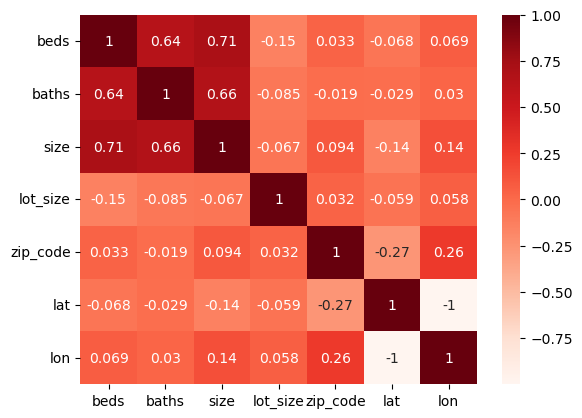

In [32]:
# Using seaborn for heatmap
heatmap = sns.heatmap(X_test.corr(), cmap="Reds", annot=True)     
plt.show()

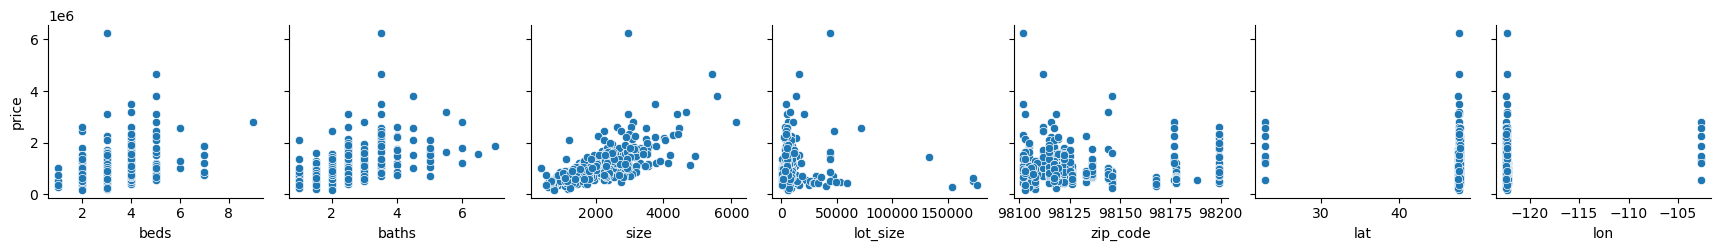

In [33]:
# Using seaborn for pairplot 
#pairplot = sns.load_dataset("model")
#sns.pairplot(pairplot)
y = pd.Series(y_pred, name='price')
sns.pairplot(test_file_final, x_vars=X_test.columns, y_vars=y_test.name)
plt.show()

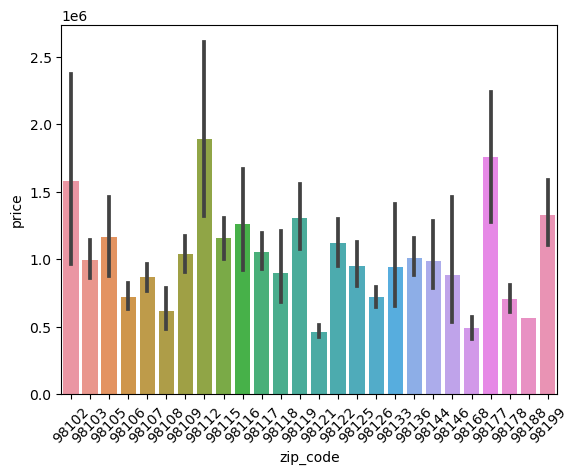

In [34]:
# Using seaborn for barplot
sns.barplot(x='zip_code', y='price', data=test_file_final)
plt.xticks(rotation=45)
plt.show()

Random Forest Regressor

In [35]:
# Define the features
X = train_file_final.drop(columns='price', axis=1)
y = train_file_final['price']

In [36]:
X_test2 = test_file_final.drop(columns='price', axis=1)
y_test2 = test_file_final['price']

In [37]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.fit_transform(X_test2)

In [38]:
# Create regressor object
regressor = RandomForestRegressor(n_estimators = 300, random_state=0)

In [39]:
# Fit the model
regressor.fit(X_scaled, y)

RandomForestRegressor(n_estimators=300, random_state=0)

In [40]:
# make predictions using the data
pred = regressor.predict(X_test_scaled).round()
pred.shape

(428,)

In [41]:
# Print mean absolute error
metrics.mean_absolute_error(y_test2, pred)

277578.5887850467

In [42]:
# Print mean absolute error
metrics.mean_absolute_error(y_test2, pred)

277578.5887850467

In [43]:
# Print root mean squared error
np.sqrt(metrics.mean_absolute_error(y_test2, pred))

526.8572755358388